In [803]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [804]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [805]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# 1. Data Preprocessing

In [806]:
data.shape

(7920, 3)

In [807]:
data.duplicated().sum()

np.int64(0)

In [808]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## 1.1. Text Preprocessing

In [809]:
import re
import string

##### Convert Uppercase Letters to Lowercase

In [810]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [811]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


##### Remove Web Links

In [812]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags = re.MULTILINE) for x in x.split()))

In [813]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


##### Remove Punctuation Marks

In [814]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [815]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
    
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [816]:
data.tail(3)

,id,label,tweet
7917,7918,0,helping my lovely 90 year old neighbor with he...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


##### Remove Numbers

In [817]:
data["tweet"] = data["tweet"].str.replace(r'\d+','', regex = True)

In [818]:
data.tail(3)

,id,label,tweet
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


##### Remove StopWords

In [819]:
!pip install nltk

In [820]:
import nltk

In [821]:
nltk.download('stopwords', download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [822]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [ ]:
sw # Removing these words

In [824]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [825]:
data.tail(3)

,id,label,tweet
7917,7918,0,helping lovely year old neighbor ipad morning ...
7918,7919,0,finally got smart pocket wifi stay connected a...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


##### Stemming >> ( create = creating/created/creation )

In [826]:
from nltk.stem import PorterStemmer
ps = PorterStemmer ()

In [827]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem (x) for x in x.split()))

In [828]:
data.tail(3)

,id,label,tweet
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...
7919,7920,0,appl barcelona appl store bcn barcelona travel...


## 1.2. Building a Vocabulary

In [829]:
from collections import Counter
vocab = Counter()

In [830]:
vocab

Counter()

In [831]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [832]:
len(vocab) # Features

15949

In [833]:
data.shape # Data-Rows

(7920, 3)

FEATURE count in vocabulary (vocab) is higher than DATA_ROW count. So can be OVERFITTING.

In [1058]:
token = [key for key in vocab if vocab[key] > 20]

In [1059]:
len(token) # New-Features|

656

Now FEATURE count in vocabulary (token) is lower than DATA_ROW count.


In [1060]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()
save_vocabulary(token, '../static/model/vocabulary.txt')

## 1.3. Divide Dataset

In [1061]:
x = data['tweet']
y = data['label']

In [1062]:
!pip install scikit-learn

In [1063]:
from sklearn.model_selection import train_test_split

In [1064]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size = 0.2)

In [1065]:
x_train.shape

(6336,)

In [1066]:
x_test.shape

(1584,)

In [1067]:
x_train

1324    like appl iphon thought appl fan brainwash got...
47       ahhhh look got christma iphon appl christma girl
979     suckerrrrr self selfi suck lollypop candi swee...
4275    new iphon x get readi peopl it’ go intens ipho...
2435    imagin music combo fire iphon instagram goodmu...
                              ...                        
2750              new iphon live without one beauti iphon
6631      hate phone hate phone hate phone hateiphon hate
1505    new avatar ninja youll love ninjanaptap iphon ...
5138    exactli day sinc got iphon lock button broke w...
757     steve job die regret life didnt flash back dea...
Name: tweet, Length: 6336, dtype: object

In [1068]:
x_test

2325    morn stroll girl familyfirst shanghai nofilt i...
6408    bad can’t figur issu applesupport batteri mani...
7835               cant find old pictur actual hate updat
1553           iphon c avail indonesia januari appl iphon
2187    smoke smoke portrait shoot shoot tfp tfpmodel ...
                              ...                        
6114       thank iphon im super weekend phone appl addict
5057    dont love find anyon iphon longer text cuz swi...
7719    love new camera moon moon samsung nofilt nightski
456     kierannisbet dont think haha staff rude letter...
2419                         phone lock tell turn goiphon
Name: tweet, Length: 1584, dtype: object

## 1.4. Vectorization

Texts are converting into Numerical Numbers

In [1069]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
    
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
    
        vectorized_lst.append(sentence_lst)
    
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [1070]:
vectorized_x_train = vectorizer(x_train, token)

In [1071]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 656), dtype=float32)

In [1072]:
vectorized_x_test = vectorizer(x_test, token)

In [1073]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 656), dtype=float32)

In [1074]:
y_train

1324    0
47      0
979     1
4275    0
2435    0
       ..
2750    0
6631    1
1505    0
5138    1
757     1
Name: label, Length: 6336, dtype: int64

In [1075]:
y_test

2325    0
6408    1
7835    1
1553    1
2187    0
       ..
6114    0
5057    1
7719    0
456     1
2419    1
Name: label, Length: 1584, dtype: int64

In [1076]:
y_train.value_counts()

label
0    4733
1    1603
Name: count, dtype: int64

The data set is imbalanced 4716 : 1628

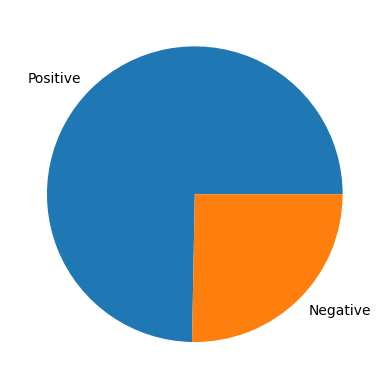

In [1077]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative' ])
plt.show()

## 1.5. Handling Imbalanced dataset 4716 : 1628

In [1078]:
!pip install imbalanced-learn

In [1079]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9466, 656) (9466,)


In [1080]:
y_train_smote.value_counts()

label
0    4733
1    4733
Name: count, dtype: int64

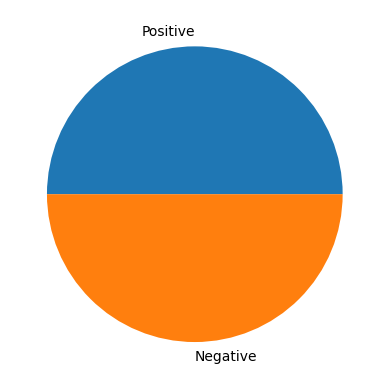

In [1081]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative' ])
plt.show()

In [1082]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9466, 656), dtype=float32)

In [1083]:
y_train_smote

0       0
1       0
2       1
3       0
4       0
       ..
9461    1
9462    1
9463    1
9464    1
9465    1
Name: label, Length: 9466, dtype: int64

In [1084]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 656), dtype=float32)

In [1085]:
y_test

2325    0
6408    1
7835    1
1553    1
2187    0
       ..
6114    0
5057    1
7719    0
456     1
2419    1
Name: label, Length: 1584, dtype: int64

# 2. Model Training & Evaluation

In [1086]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### Creating a function to Evaluate the model and to check performance

In [1087]:
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def testing_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## 2.1. Logistic Regression Model

In [1088]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

LogisticRegression()

##### Checking TRAINED dataset's accuracy

In [1089]:
y_train_predicted = lr.predict(vectorized_x_train_smote)
y_train_predicted

array([0, 0, 1, ..., 1, 1, 1], shape=(9466,))

In [1090]:
training_scores(y_train_smote, y_train_predicted)

Training Scores:
	Accuracy = 0.924
	Precision = 0.898
	Recall = 0.955
	F1-Score = 0.926


##### Checking TEST dataset's accuracy

In [1091]:
y_test_predicted = lr.predict(vectorized_x_test)
y_test_predicted

array([0, 1, 1, ..., 0, 1, 1], shape=(1584,))

In [1092]:
testing_scores(y_test, y_test_predicted)

Testing Scores:
	Accuracy = 0.853
	Precision = 0.677
	Recall = 0.858
	F1-Score = 0.757


## 2.2. Multinomial Naive Bayes Model

In [1093]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

MultinomialNB()

In [1094]:
y_train_predicted = mnb.predict(vectorized_x_train_smote)
y_test_predicted = mnb.predict(vectorized_x_test)

In [1095]:
training_scores(y_train_smote, y_train_predicted)
testing_scores(y_test, y_test_predicted)

Training Scores:
	Accuracy = 0.895
	Precision = 0.862
	Recall = 0.94
	F1-Score = 0.899
Testing Scores:
	Accuracy = 0.85
	Precision = 0.658
	Recall = 0.915
	F1-Score = 0.766


## 2.3. Decicion Tree Model

In [1096]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

DecisionTreeClassifier()

In [1104]:
y_train_predicted = dt.predict(vectorized_x_train_smote)
y_test_predicted = dt.predict(vectorized_x_test)

In [1105]:
training_scores(y_train_smote, y_train_predicted)
testing_scores(y_test, y_test_predicted)

Training Scores:
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.807
	Precision = 0.651
	Recall = 0.603
	F1-Score = 0.626


## 2.4. Random Forest Model

In [1106]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

RandomForestClassifier()

In [1107]:
y_train_predicted = rf.predict(vectorized_x_train_smote)
y_test_predicted = rf.predict(vectorized_x_test)

In [1108]:
training_scores(y_train_smote, y_train_predicted)
testing_scores(y_test, y_test_predicted)

Training Scores:
	Accuracy = 0.999
	Precision = 0.998
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.862
	Precision = 0.739
	Recall = 0.745
	F1-Score = 0.742


## 2.5. Support Vector Classifier Model - SVC

In [1109]:
svc = SVC()
svc.fit(vectorized_x_train_smote, y_train_smote)

SVC()

In [1110]:
y_train_predicted = svc.predict(vectorized_x_train_smote)
y_test_predicted = svc.predict(vectorized_x_test)

In [1111]:
training_scores(y_train_smote, y_train_predicted)
testing_scores(y_test, y_test_predicted)

Training Scores:
	Accuracy = 0.968
	Precision = 0.947
	Recall = 0.992
	F1-Score = 0.969
Testing Scores:
	Accuracy = 0.859
	Precision = 0.701
	Recall = 0.825
	F1-Score = 0.758


# 3. Save & Load the Model

In [1117]:
import pickle
with open ('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)